# Compare predicted vs real eQTL effect sizes

In [1]:
import sys
import numpy as np
import pandas as pd
import os
import scipy
from tqdm import tqdm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from plotnine import *
%matplotlib inline

## Paths

In [2]:
eqtl_file = 'scored_sceqtls.csv'

## Load data

In [3]:
eqtl_df = pd.read_csv(eqtl_file)

## Subset to high-confidence sc-eQTLs

In [4]:
eqtl_df['label'] = eqtl_df.pip > 0.9
eqtl_df = eqtl_df[eqtl_df.label].copy()
eqtl_df_pred = eqtl_df[eqtl_df.abs_matched_score > 0.01].copy()

len(eqtl_df), len(eqtl_df_pred)

(987, 446)

# Predicting the beta for positive variants

In [5]:
print("Decima")
print(scipy.stats.pearsonr(eqtl_df['beta'], eqtl_df['matched_score']))
print(scipy.stats.pearsonr(eqtl_df_pred['beta'], eqtl_df_pred['matched_score']))

print("Borzoi whole blood")
print(scipy.stats.pearsonr(eqtl_df['beta'], eqtl_df['borzoi_wholeblood_score']))
print(scipy.stats.pearsonr(eqtl_df_pred['beta'], eqtl_df_pred['borzoi_wholeblood_score']))

print("Borzoi matched")
print(scipy.stats.pearsonr(eqtl_df['beta'], eqtl_df['borzoi_matched_score']))
print(scipy.stats.pearsonr(eqtl_df_pred['beta'], eqtl_df_pred['borzoi_matched_score']))

Decima
PearsonRResult(statistic=np.float64(0.4184705963682267), pvalue=np.float64(4.0222241838994025e-43))
PearsonRResult(statistic=np.float64(0.5795411797442807), pvalue=np.float64(2.2568169438935305e-41))
Borzoi whole blood
PearsonRResult(statistic=np.float64(0.2722269136025473), pvalue=np.float64(3.1327618276219165e-18))
PearsonRResult(statistic=np.float64(0.399466716169543), pvalue=np.float64(1.623533697206646e-18))
Borzoi matched
PearsonRResult(statistic=np.float64(0.3587596819945803), pvalue=np.float64(2.3872007963117266e-31))
PearsonRResult(statistic=np.float64(0.4970111058035903), pvalue=np.float64(3.3468589209989807e-29))


In [6]:
print(accuracy_score(eqtl_df['beta'] > 0, eqtl_df['matched_score'] > 0))
print(accuracy_score(eqtl_df_pred['beta'] > 0, eqtl_df_pred['matched_score'] > 0))

0.6828774062816616
0.8766816143497758


## Visualize

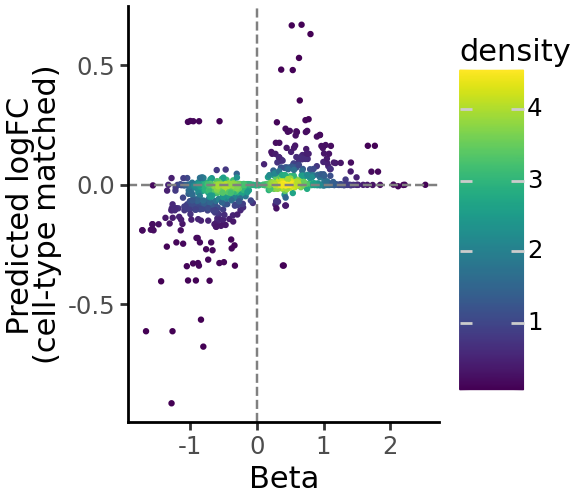

In [7]:
(
    ggplot(eqtl_df, aes(x='beta', y = 'matched_score')) +\
    geom_pointdensity(size=.3) + theme_classic() + theme(figure_size=(2.9, 2.5)) 
    + xlab("Beta") + ylab("   Predicted logFC\n(cell-type matched)")
    + geom_vline(xintercept=0, color='grey', linetype='dashed') 
    + geom_hline(yintercept=0, color='grey', linetype='dashed') 
)